In [1]:
import pandas as pd 
data1=pd.read_csv('C:\\Users\\ashranja\\Downloads\\Convert R Codes to Python\\Convert R Codes to Python\\2.Logistic Regression\\Sagar\\Teleco_Cust_Attr.csv')

In [2]:
data1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
data1.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [4]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
X=data1.drop(['customerID','Churn'],axis=1)

In [7]:
y=data1.Churn

In [8]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [9]:
X.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [10]:
X.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [11]:
X.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [12]:

X= X.replace({'Yes': 1, 'No': 0})

In [13]:
X= X.replace({'No phone service': 0, 'No internet service': 0})

In [14]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65


In [15]:
x_dummy=pd.get_dummies(X.loc[:,['gender','InternetService','Contract','PaymentMethod']])

In [16]:
X=X.drop(['gender','InternetService','Contract','PaymentMethod'],axis=1)

In [17]:
X=pd.concat([X,x_dummy],axis=1)

In [18]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [19]:
y=y.replace({'Yes':1,'No':0})

In [20]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [21]:
print(X.columns)
X.dtypes


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                                uint8
gender_Male                                  uint8
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [22]:
X['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
         ...   
7013     3756.4
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019        826
7020        239
7021      727.8
7022     7544.3
7023     6479.4
7024    3626.35
7025     1679.4
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031     3316.1
7032      75.75
7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Leng

In [23]:
X['TotalCharges']=X['TotalCharges'].replace(' ',np.nan)

In [24]:
X['TotalCharges'].isna().sum()

11

In [25]:
X['TotalCharges']=X['TotalCharges'].astype('float')

In [26]:
X.loc[X['TotalCharges'].isna(),'TotalCharges']=X['TotalCharges'].mean()

In [27]:
logit=LogisticRegression()

In [28]:
model_log=logit.fit(X,y)

C:\Users\ashranja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
predict1=model_log.predict(X)

In [30]:
###1. Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(predict1, y)

In [31]:
confusion

array([[4675,  863],
       [ 499, 1006]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y, predict1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5174
           1       0.67      0.54      0.60      1869

   micro avg       0.81      0.81      0.81      7043
   macro avg       0.76      0.72      0.73      7043
weighted avg       0.80      0.81      0.80      7043



In [33]:
?train_test_split

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int or None, optional (default=0.25)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` is unspecified, o

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [35]:
#y_pred_proba

In [39]:
# check classification scores of logistic regression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss ,accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_proba = logreg.predict_proba(x_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
print(tpr.mean())


Train/Test split results:
LogisticRegression accuracy is 0.812
LogisticRegression log_loss is 0.400
LogisticRegression auc is 0.858
0.636056711938748


C:\Users\ashranja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


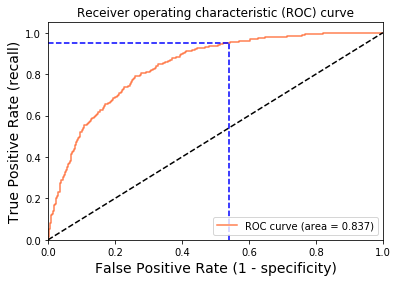

Using a threshold of 0.092 guarantees a sensitivity of 0.951 and a specificity of 0.458, i.e. a false positive rate of 54.17%.


In [37]:
% matplotlib inline
import matplotlib.pyplot as plt
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensitivity > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [139]:
idx

516